<a href="https://colab.research.google.com/github/Daivar/Caltech101/blob/main/Caltech101__RIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -rf datasets

In [3]:
!mkdir -p datasets
# !pip install gdown # not necessary when running on google collab
!gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output datasets/caltech101.tar.gz
!tar -xvzf datasets/caltech101.tar.gz --directory datasets
!mv datasets/101_ObjectCategories datasets/caltech101
!rm -rf datasets/caltech101/BACKGROUND_Google

Srautinio perdavimo išvestis sutrumpinta iki kelių paskutinių eilučių (5000).
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jp

In [36]:
!ls -laht ./datasets
!du -hcs ./datasets/caltech101

total 126M
drwxr-xr-x   1 root root 4.0K Jan  4 08:58 ..
drwxr-xr-x 103  411  300 4.0K Jan  4 08:54 caltech101
drwxr-xr-x   3 root root 4.0K Jan  4 08:54 .
-rw-r--r--   1 root root 126M Jan  4 08:54 caltech101.tar.gz
133M	./datasets/caltech101
133M	total


In [37]:
import os
print(os.environ)

# finally the check
if 'COLAB_GPU' in os.environ:
   print("I'm running on Colab")

vars(os.environ)['_data']

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', '__EGL_VENDOR_LIBRARY_DIRS': '/usr/lib64-nvidia:/usr/share/glvnd/egl_vendor.d/', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/lib64-nvidia', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20211202', 'JPY_PARENT_PID': '57', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLs

{b'CLICOLOR': b'1',
 b'CLOUDSDK_CONFIG': b'/content/.config',
 b'CLOUDSDK_PYTHON': b'python3',
 b'COLAB_GPU': b'1',
 b'CUDA_VERSION': b'11.1.1',
 b'CUDNN_VERSION': b'8.0.5.39',
 b'DATALAB_SETTINGS_OVERRIDES': b'{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}',
 b'DEBIAN_FRONTEND': b'noninteractive',
 b'ENABLE_DIRECTORYPREFETCHER': b'1',
 b'ENV': b'/root/.bashrc',
 b'GCE_METADATA_TIMEOUT': b'0',
 b'GCS_READ_CACHE_BLOCK_SIZE_MB': b'16',
 b'GIT_PAGER': b'cat',
 b'GLIBCPP_FORCE_NEW': b'1',
 b'GLIBCXX_FORCE_NEW': b'1',
 b'HOME': b'/root',
 b'HOSTNAME': b'fbfa3957818a',
 b'JPY_PARENT_PID': b'57',
 b'KMP_DUPLICATE_LIB_OK': b'True',
 b'KMP_INIT_AT_FORK': b'FALSE',
 b'LANG': b'en_US.UTF-8',
 b'LAST_FORCED_REBUILD': b'20211202',
 b'LD_LIBRARY_PATH': b'/usr/lib64-nvidia',
 b'LD_PRELOAD': b'/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4',
 b'LIBRARY_PATH': b'/us

In [38]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import random
import time
import math
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [39]:
def model_picker(name):
    if (name == 'vgg16'):
        model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'vgg19'):
        model = VGG19(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'mobilenet'):
        model = MobileNet(weights='imagenet',
                          include_top=False,
                          input_shape=(224, 224, 3),
                          pooling='max',
                          depth_multiplier=1, # TODO :: explanation
                          alpha=1) # TODO :: explnation
    elif (name == 'inception'):
        model = InceptionV3(weights='imagenet',
                            include_top=False,
                            input_shape=(224, 224, 3),
                            pooling='max')
    elif (name == 'resnet'):
        model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='max')
    elif (name == 'xception'):
        model = Xception(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='max')
    else:
        print("Specified model not available")
    return model

In [59]:
model_architecture = 'resnet'
model = model_picker(model_architecture)

In [41]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = tensorflow.keras.applications.resnet50.preprocess_input(expanded_img_array)

    features = model.predict(preprocessed_img)              # pass the image through CNN (no head!)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features) # comes from numpy.linalg
    return normalized_features

In [42]:
features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)
print(len(features))
print(features.shape) # flat

2048
(2048,)


In [ ]:
model.summary()

In [44]:
arr = np.array([30,2,1]) #linalg.norm - normalizuoja

print(arr)
print(norm(arr))
print(arr / norm(arr)) 

print((arr - arr.mean()) / arr.std()) 

import numpy as np
from sklearn.preprocessing import normalize
norm1 = arr / np.linalg.norm(arr)
norm2 = normalize(arr[:,np.newaxis], axis=0).ravel()
print(np.all(norm1 == norm2))

[30  2  1]
30.083217912982647
[0.99723374 0.06648225 0.03324112]
[ 1.4135611  -0.66958157 -0.74397953]
True


In [45]:
model = model_picker('mobilenet')
%timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

10 loops, best of 5: 70.3 ms per loop


In [46]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

In [47]:
from tqdm.notebook import tqdm as tqdm_nb

# path to the your datasets
root_dir = 'datasets/caltech101'
filenames = sorted(get_file_list(root_dir)[:1000]) # remove :1000 on final run

feature_list = []
model = model_picker('mobilenet')
for i in tqdm_nb(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))



  0%|          | 0/1000 [00:00<?, ?it/s]

In [48]:
batch_size = 64
datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

generator = datagen.flow_from_directory(root_dir,
                                        target_size=(224, 224),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

num_images = len(generator.filenames)

num_epochs = int(math.ceil(num_images / batch_size))

model = model_picker('mobilenet')
start_time = time.time()
feature_list = []
feature_list = model.predict(generator, num_epochs) # workers=4, use_multiprocessing=True)
end_time = time.time()

Found 8677 images belonging to 101 classes.


In [49]:
for i, features in enumerate(feature_list):
    feature_list[i] = features / norm(features)

feature_list = feature_list.reshape(num_images, -1)

print("Num images   = ", len(generator.classes))
print("Shape of feature_list = ", feature_list.shape)
print("Time taken in sec = ", end_time - start_time)

Num images   =  8677
Shape of feature_list =  (8677, 1024)
Time taken in sec =  23.14169216156006


In [50]:
filenames = [root_dir + '/' + s for s in generator.filenames]

In [51]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [52]:
TRAIN_SAMPLES = 8677
NUM_CLASSES = 101
IMG_WIDTH, IMG_HEIGHT = 224, 224

In [53]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

In [54]:
train_generator = train_datagen.flow_from_directory(root_dir,
                                                    target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')

Found 8677 images belonging to 101 classes.


In [55]:
def model_maker():
    base_model = ResNet50(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    for layer in base_model.layers[:]:
        # layer.trainable = False
        layer.trainable = True
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    return Model(inputs=input, outputs=predictions)

In [56]:
from keras.models import load_model

In [29]:
%%time
model_finetuned = model_maker()
model_finetuned.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(0.001), metrics=['acc'])
# model_finetuned = load_model('./model-finetuned.h5')
model_finetuned.fit(train_generator, steps_per_epoch=math.ceil(float(TRAIN_SAMPLES) / batch_size), epochs=15)

Epoch 1/15
136/136 [==============================] - 195s 1s/step - loss: 3.5301 - acc: 0.2818
Epoch 2/15
136/136 [==============================] - 185s 1s/step - loss: 2.9810 - acc: 0.3661
Epoch 3/15
136/136 [==============================] - 184s 1s/step - loss: 2.4418 - acc: 0.4503
Epoch 4/15
136/136 [==============================] - 194s 1s/step - loss: 2.1592 - acc: 0.5024
Epoch 5/15
136/136 [==============================] - 185s 1s/step - loss: 1.9703 - acc: 0.5369
Epoch 6/15
136/136 [==============================] - 184s 1s/step - loss: 1.6425 - acc: 0.5935
Epoch 7/15
136/136 [==============================] - 186s 1s/step - loss: 1.5203 - acc: 0.6157
Epoch 8/15
136/136 [==============================] - 185s 1s/step - loss: 1.2991 - acc: 0.6627
Epoch 9/15
136/136 [==============================] - 184s 1s/step - loss: 1.1571 - acc: 0.6975
Epoch 10/15
136/136 [==============================] - 184s 1s/step - loss: 1.0516 - acc: 0.7210
Epoch 11/15
136/136 [==================

In [74]:
model = model_picker(model_architecture)


In [75]:
model_finetuned.save('./model-finetuned.h5')

INFO:tensorflow:Assets written to: ./model-finetuned.h51/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [76]:
filenames = [root_dir + '/' + s for s in generator.filenames]

In [77]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [78]:
pickle.dump(generator.classes, open('./data/class_ids-caltech101.pickle', 'wb'))
pickle.dump(filenames, open('./data/filenames-caltech101.pickle', 'wb'))
pickle.dump(feature_list, open('./data/features-caltech101-' + model_architecture + '.pickle', 'wb'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.save('./model-finetuned.h5')
model.summary()

In [ ]:
model_finetuned.summary()

In [81]:
from keras import Sequential

finetunned_cnn = Sequential()
finetunned_cnn.add(model_finetuned.get_layer('resnet50'))
finetunned_cnn.add(GlobalAveragePooling2D())

start_time = time.time()
feature_list_finetuned = []
feature_list_finetuned = finetunned_cnn.predict(generator, num_epochs)
end_time = time.time()

for i, features_finetuned in enumerate(feature_list_finetuned):
    feature_list_finetuned[i] = features_finetuned / norm(features_finetuned)
feature_list = feature_list_finetuned.reshape(num_images, -1)

print("Num images = ", len(generator.classes))
print("Shape of feature_list = ", feature_list.shape)
print("Time taken in sec = ", end_time - start_time)
print("Items per second = ", len(generator.classes) / (end_time - start_time))

Num images =  8677
Shape of feature_list =  (8677, 2048)
Time taken in sec =  52.58764147758484
Items per second =  165.00074458936362


In [82]:
pickle.dump(feature_list, open('./features-caltech101-resnet-finetuned.pickle', 'wb'))

In [85]:
filenames = pickle.load(open('./data/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('./data/features-caltech101-resnet.pickle', 'rb'))
class_ids = pickle.load(open('./data/class_ids-caltech101.pickle', 'rb'))

In [86]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  8677
Number of features per image =  1024


In [88]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [89]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)

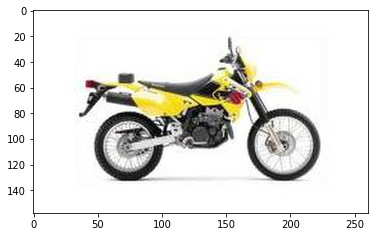

In [90]:
random_index = 1500 # 889
distances, indices = neighbors.kneighbors([feature_list[random_index]])
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

In [91]:
print(indices)
print(distances)

[[1500 1497 1498 1499 1495]]
[[0.         0.4207595  0.42253882 0.44231138 0.44462597]]


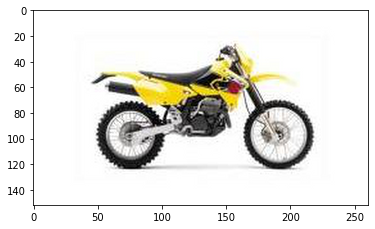

In [93]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

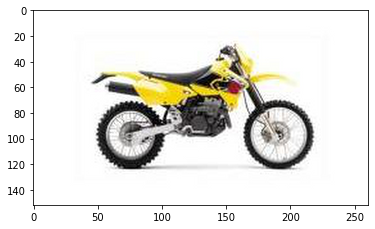

In [94]:
plt.imshow(mpimg.imread(filenames[indices[0][2]]), interpolation='lanczos')

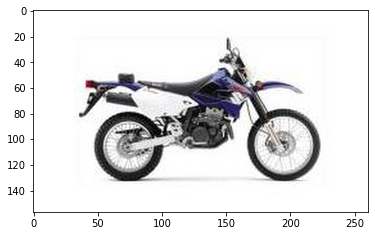

In [95]:
plt.imshow(mpimg.imread(filenames[indices[0][3]]), interpolation='lanczos')

In [96]:
for i in range(5):
    print(distances[0][i])

0.0
0.4207595
0.42253882
0.44231138
0.44462597
